<a href="https://colab.research.google.com/github/hariharandanam/grid_intelligence/blob/main/assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as wr
wr.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:

df = pd.read_csv('/content/drive/MyDrive/visionforge/data.csv')
print("Top 5 rows of the DataFrame:")
print(df.head())
print("\nLast 5 rows of the DataFrame:")
print(df.tail())

Top 5 rows of the DataFrame:
  Make       Model  Year             Engine Fuel Type  Engine HP  \
0  BMW  1 Series M  2011  premium unleaded (required)      335.0   
1  BMW    1 Series  2011  premium unleaded (required)      300.0   
2  BMW    1 Series  2011  premium unleaded (required)      300.0   
3  BMW    1 Series  2011  premium unleaded (required)      230.0   
4  BMW    1 Series  2011  premium unleaded (required)      230.0   

   Engine Cylinders Transmission Type     Driven_Wheels  Number of Doors  \
0               6.0            MANUAL  rear wheel drive              2.0   
1               6.0            MANUAL  rear wheel drive              2.0   
2               6.0            MANUAL  rear wheel drive              2.0   
3               6.0            MANUAL  rear wheel drive              2.0   
4               6.0            MANUAL  rear wheel drive              2.0   

                         Market Category Vehicle Size Vehicle Style  \
0  Factory Tuner,Luxury,High-Perfo

In [5]:
print("Data types of each column:")
print(df.dtypes)

Data types of each column:
Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object


In [6]:

columns_to_remove = [
    "Engine Fuel Type",
    "Market Category",
    "Vehicle Style",
    "Popularity",
    "Number of Doors",
    "Vehicle Size"
]
df = df.drop(columns=columns_to_remove)
print("\n Top 5 rows of the DataFrame:")
print(df.head())



 Top 5 rows of the DataFrame:
  Make       Model  Year  Engine HP  Engine Cylinders Transmission Type  \
0  BMW  1 Series M  2011      335.0               6.0            MANUAL   
1  BMW    1 Series  2011      300.0               6.0            MANUAL   
2  BMW    1 Series  2011      300.0               6.0            MANUAL   
3  BMW    1 Series  2011      230.0               6.0            MANUAL   
4  BMW    1 Series  2011      230.0               6.0            MANUAL   

      Driven_Wheels  highway MPG  city mpg   MSRP  
0  rear wheel drive           26        19  46135  
1  rear wheel drive           28        19  40650  
2  rear wheel drive           28        20  36350  
3  rear wheel drive           28        18  29450  
4  rear wheel drive           28        18  34500  


In [7]:
columns_to_rename = {
    "Engine HP": "HP",
    "Engine Cylinders": "Cylinders",
    "Transmission Type": "Transmission",
    "Driven_Wheels": "Drive Mode",
    "highway MPG": "MPG-H",
    "city mpg": "MPG-C",
    "MSRP": "Price"
}
df = df.rename(columns=columns_to_rename)
print("\n Top 5 rows of the DataFrame:")
print(df.head())


 Top 5 rows of the DataFrame:
  Make       Model  Year     HP  Cylinders Transmission        Drive Mode  \
0  BMW  1 Series M  2011  335.0        6.0       MANUAL  rear wheel drive   
1  BMW    1 Series  2011  300.0        6.0       MANUAL  rear wheel drive   
2  BMW    1 Series  2011  300.0        6.0       MANUAL  rear wheel drive   
3  BMW    1 Series  2011  230.0        6.0       MANUAL  rear wheel drive   
4  BMW    1 Series  2011  230.0        6.0       MANUAL  rear wheel drive   

   MPG-H  MPG-C  Price  
0     26     19  46135  
1     28     19  40650  
2     28     20  36350  
3     28     18  29450  
4     28     18  34500  


In [10]:
# Display the original shape of the dataset
original_shape = df.shape
print(f"Original shape of the dataset: {original_shape}")

# Count the number of duplicated rows
num_duplicates = df.duplicated().sum()
print(f"Number of duplicated rows: {num_duplicates}")

# Drop duplicate rows
df = df.drop_duplicates()

# Display the new shape of the dataset
new_shape = df.shape
print(f"New shape of the dataset after dropping duplicates: {new_shape}")


Original shape of the dataset: (10925, 10)
Number of duplicated rows: 0
New shape of the dataset after dropping duplicates: (10925, 10)


In [11]:
numerical_stats = {
    "Sum": df.sum(numeric_only=True),
    "Mean": df.mean(numeric_only=True),
    "Standard Deviation": df.std(numeric_only=True),
    "Minimum": df.min(numeric_only=True),
    "25th Percentile": df.quantile(0.25, numeric_only=True),
    "Median (50th Percentile)": df.median(numeric_only=True),
    "75th Percentile": df.quantile(0.75, numeric_only=True),
    "Maximum": df.max(numeric_only=True),
}
for stat, values in numerical_stats.items():
    print(f"\n{stat}:\n{values}")



Sum:
Year          21969278.0
HP             2761761.0
Cylinders        61755.0
MPG-H           291203.0
MPG-C           215996.0
Price        464275308.0
dtype: float64

Mean:
Year          2010.917895
HP             254.399503
Cylinders        5.668196
MPG-H           26.654737
MPG-C           19.770801
Price        42496.595698
dtype: float64

Standard Deviation:
Year             7.016102
HP             109.771351
Cylinders        1.799464
MPG-H            9.031109
MPG-C            9.259532
Price        62053.533610
dtype: float64

Minimum:
Year         1990.0
HP             55.0
Cylinders       0.0
MPG-H          12.0
MPG-C           7.0
Price        2000.0
dtype: float64

25th Percentile:
Year          2007.0
HP             173.0
Cylinders        4.0
MPG-H           22.0
MPG-C           16.0
Price        21995.0
Name: 0.25, dtype: float64

Median (50th Percentile):
Year          2015.0
HP             240.0
Cylinders        6.0
MPG-H           25.0
MPG-C           18.0
Price      

In [12]:
missing_values_before = df.isnull().sum()
print("Sum of missing or null values for each column (before cleaning):")
print(missing_values_before)

df = df.dropna()

missing_values_after = df.isnull().sum()
print("\nSum of missing or null values for each column (after cleaning):")
print(missing_values_after)


Sum of missing or null values for each column (before cleaning):
Make             0
Model            0
Year             0
HP              69
Cylinders       30
Transmission     0
Drive Mode       0
MPG-H            0
MPG-C            0
Price            0
dtype: int64

Sum of missing or null values for each column (after cleaning):
Make            0
Model           0
Year            0
HP              0
Cylinders       0
Transmission    0
Drive Mode      0
MPG-H           0
MPG-C           0
Price           0
dtype: int64


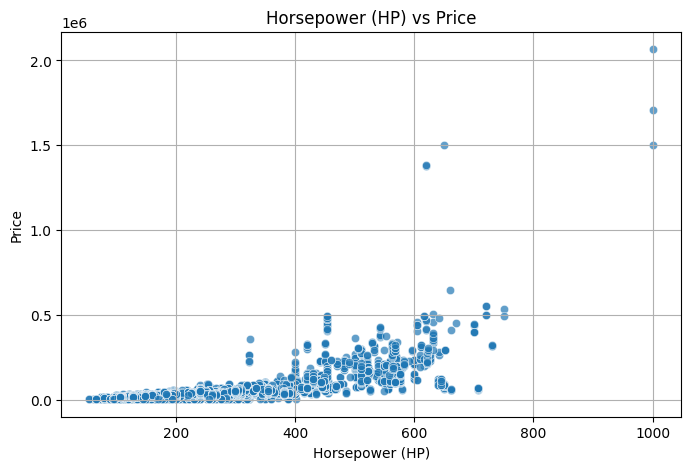

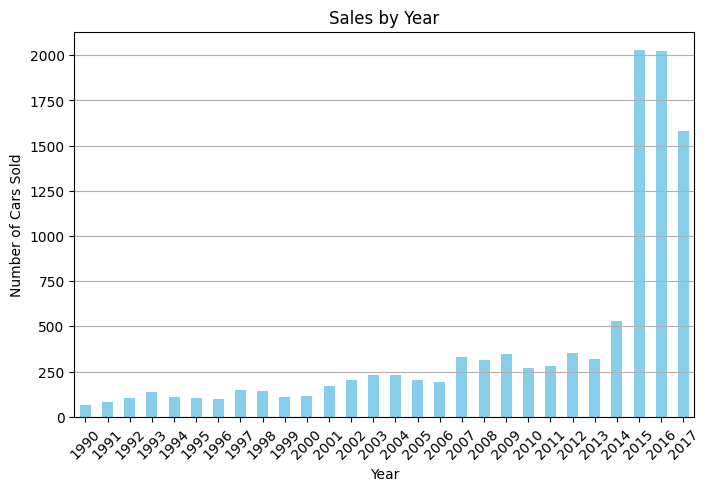

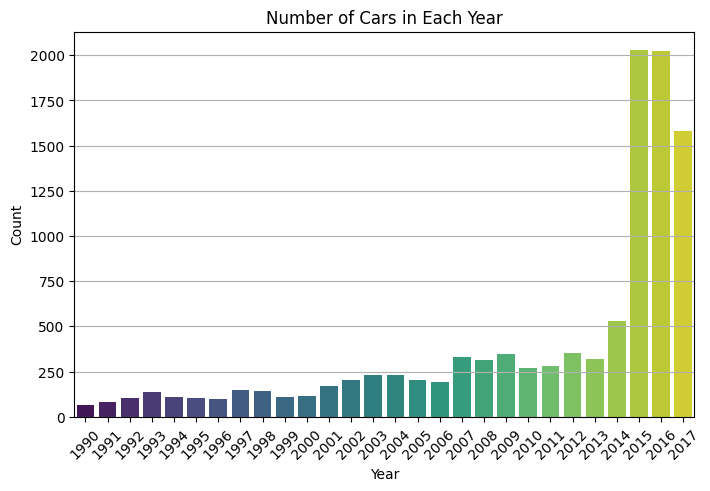

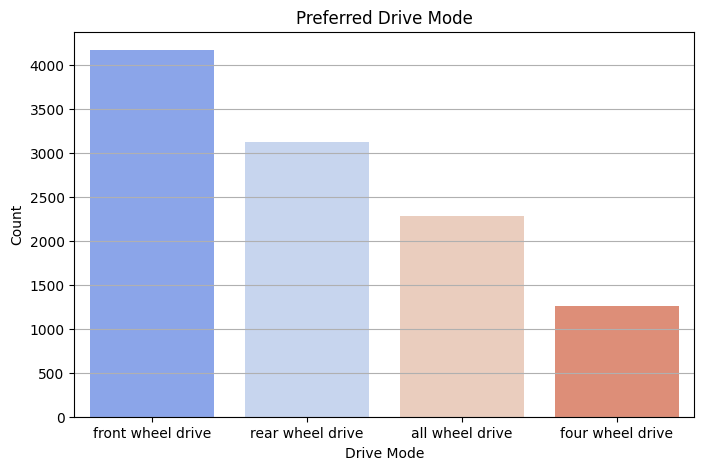

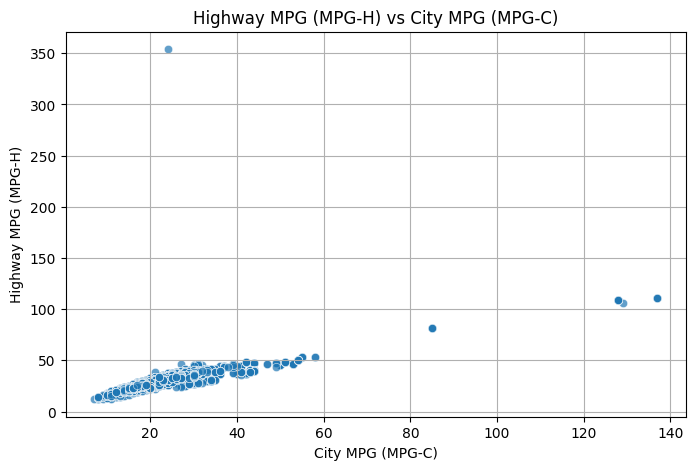

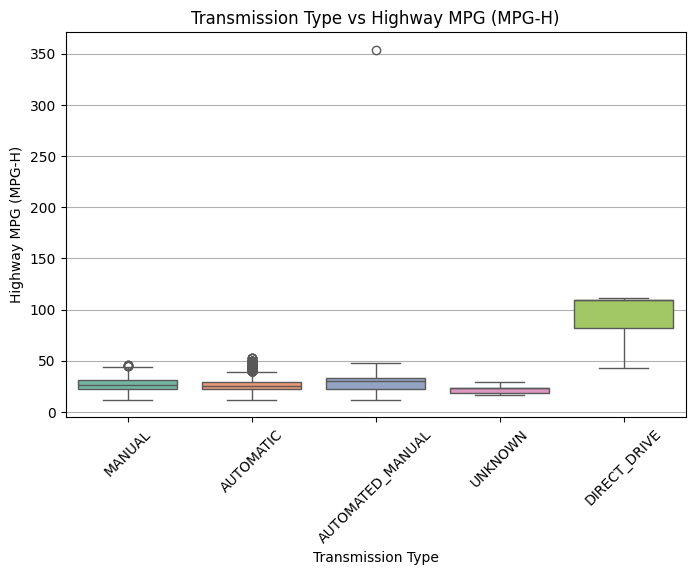

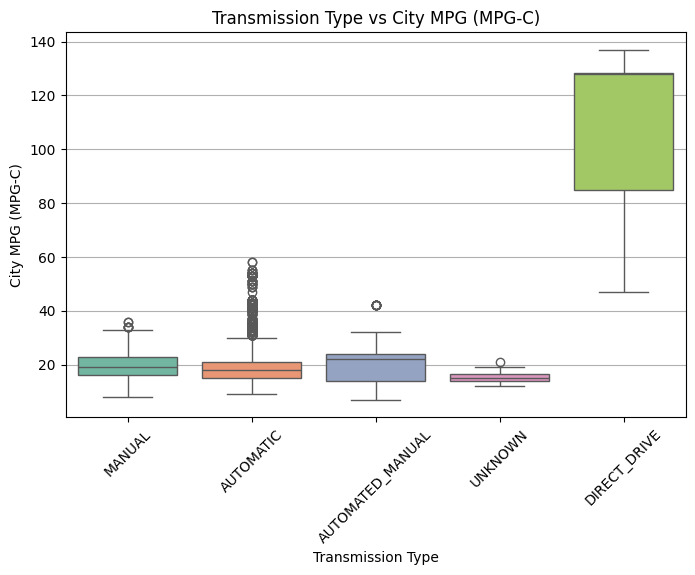

In [13]:

# 1. Horsepower (HP) vs Price
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x="HP", y="Price", alpha=0.7)
plt.title("Horsepower (HP) vs Price")
plt.xlabel("Horsepower (HP)")
plt.ylabel("Price")
plt.grid(True)
plt.show()

# 2. Sales by Year
plt.figure(figsize=(8, 5))
if 'Year' in df.columns:
    sales_by_year = df.groupby('Year').size()
    sales_by_year.plot(kind="bar", color="skyblue")
    plt.title("Sales by Year")
    plt.xlabel("Year")
    plt.ylabel("Number of Cars Sold")
    plt.xticks(rotation=45)
    plt.grid(axis="y")
    plt.show()
else:
    print("The 'Year' column is missing from the dataset.")

# 3. Number of Cars in Each Year
if 'Year' in df.columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df, x="Year", palette="viridis")
    plt.title("Number of Cars in Each Year")
    plt.xlabel("Year")
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.grid(axis="y")
    plt.show()

# 4. Preferred Drive Mode
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="Drive Mode", order=df['Drive Mode'].value_counts().index, palette="coolwarm")
plt.title("Preferred Drive Mode")
plt.xlabel("Drive Mode")
plt.ylabel("Count")
plt.grid(axis="y")
plt.show()

# 5. Highway MPG (MPG-H) vs City MPG (MPG-C)
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x="MPG-C", y="MPG-H", alpha=0.7)
plt.title("Highway MPG (MPG-H) vs City MPG (MPG-C)")
plt.xlabel("City MPG (MPG-C)")
plt.ylabel("Highway MPG (MPG-H)")
plt.grid(True)
plt.show()

# 6. Transmission Type vs MPG-H and MPG-C
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x="Transmission", y="MPG-H", palette="Set2")
plt.title("Transmission Type vs Highway MPG (MPG-H)")
plt.xlabel("Transmission Type")
plt.ylabel("Highway MPG (MPG-H)")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.show()

plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x="Transmission", y="MPG-C", palette="Set2")
plt.title("Transmission Type vs City MPG (MPG-C)")
plt.xlabel("Transmission Type")
plt.ylabel("City MPG (MPG-C)")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.show()


Numeric columns in the dataset:
Index(['Year', 'HP', 'Cylinders', 'MPG-H', 'MPG-C', 'Price'], dtype='object')

Correlation Matrix:
               Year        HP  Cylinders     MPG-H     MPG-C     Price
Year       1.000000  0.314971  -0.050598  0.284237  0.234135  0.196789
HP         0.314971  1.000000   0.788007 -0.420281 -0.473551  0.659835
Cylinders -0.050598  0.788007   1.000000 -0.611576 -0.632407  0.554740
MPG-H      0.284237 -0.420281  -0.611576  1.000000  0.841229 -0.209150
MPG-C      0.234135 -0.473551  -0.632407  0.841229  1.000000 -0.234050
Price      0.196789  0.659835   0.554740 -0.209150 -0.234050  1.000000


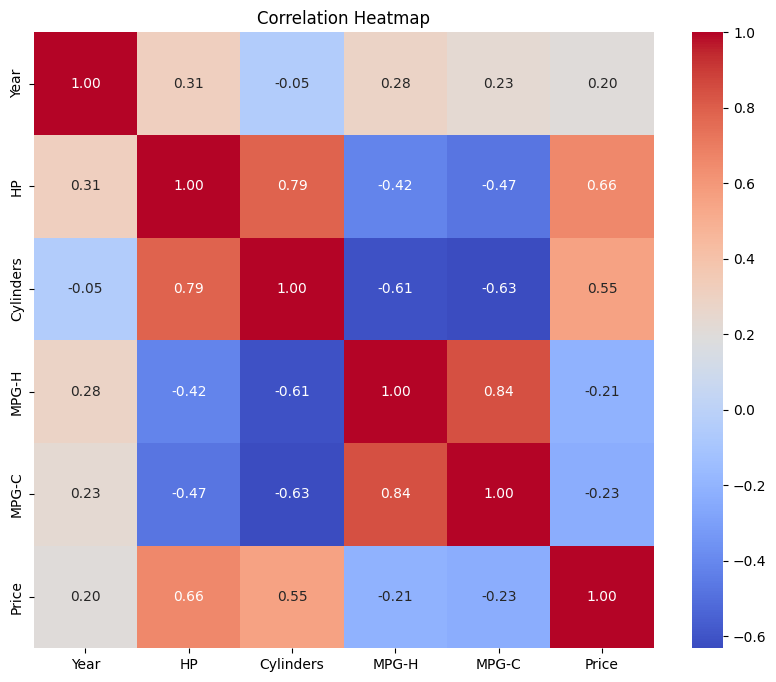

In [14]:
# Step 1: Filter numeric columns
numeric_columns = df.select_dtypes(include=['number'])
print("Numeric columns in the dataset:")
print(numeric_columns.columns)

# Step 2: Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)

# Step 3: Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap")
plt.show()
